# Preprocessing

In [34]:
import pandas as pd
import ydata_profiling as ydp
from bs4 import BeautifulSoup
import requests

## Load dataset

In [35]:
df = pd.read_csv('./data/orig_dataset.csv')
df.head()

,id,זמןסיוםמהמערכת,יישוב,סמל_יישוב,שעתהגעהלנקודה,נ.צכתובת,כתובתתיאורמיקוםנקודתהמדידה,סוגנקודתהמדידהתשובה,Index1,time,...,heged4,heged5,heged6,heged7,heged8,heged9,heged10,heged11,heged12,heged13
0,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,1,09:38:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,2,09:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,3,09:51:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,4,09:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,5,09:55:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rename the headers

In [36]:
df_cols_renamed = df.rename(columns={'זמןסיוםמהמערכת': 'sys_end_time',
                        'יישוב' : 'city',
                        'סמל_יישוב' : 'city_code',
                        'שעתהגעהלנקודה' : 'time_of_arrival',
                        'נ.צכתובת' : 'geo_location',
                        'כתובתתיאורמיקוםנקודתהמדידה' : 'location_address',
                        'סוגנקודתהמדידהתשובה' : 'location_type',
    })

In [37]:
# prof = ydp.ProfileReport(df_cols_renamed)
# prof.to_notebook_iframe()

In [38]:
df_cols_renamed[~df.heged1.isnull()]
df_cols_renamed.isnull().sum() / df_cols_renamed.shape[0] * 100

id                   0.000000
sys_end_time         0.000000
city                 0.000000
city_code            0.000000
time_of_arrival      0.487393
geo_location        38.532196
location_address     0.000000
location_type        0.000000
Index1               0.000000
time                 6.420471
parit                3.046209
teorshlilihiyuvi     2.296373
teortext             3.496110
gender               0.000000
age                  0.018746
point_type           0.000000
heged1              38.532196
heged2              87.449620
heged3              95.632205
heged4              98.453463
heged5              99.550098
heged6              99.821914
heged7              99.896898
heged8              99.953135
heged9              99.990627
heged10             99.990627
heged11             99.990627
heged12             99.990627
heged13             99.990627
dtype: float64

## Remove heged2 - heged13 due to high null counts

In [39]:
df_dropped = df_cols_renamed.drop(columns=[f'heged{i}' for i in range(2,14)])
df_dropped.head()

,id,sys_end_time,city,city_code,time_of_arrival,geo_location,location_address,location_type,Index1,time,parit,teorshlilihiyuvi,teortext,gender,age,point_type,heged1
0,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,1,09:38:00,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,רחוב מגורים,NaN
1,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,2,09:50:00,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,רחוב מגורים,NaN
2,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,3,09:51:00,NaN,חיובית,לא נזרק,נקבה,30-49,רחוב מגורים,NaN
3,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,4,09:52:00,NaN,חיובית,לא לכלכה,נקבה,10-19,רחוב מגורים,NaN
4,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,5,09:55:00,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,רחוב מגורים,NaN


## Rename cities and move to seperate csv

In [40]:
df_cities = df_cols_renamed[['city_code', 'city']].drop_duplicates()
df_cities = df_cities.sort_values(by='city_code').reset_index(drop=True)
display(df_cities)
print(df_cities.shape)

,city_code,city
0,2,מרום הגליל
1,8,הגלבוע
2,12,זבולון
3,29,חבל יבנה
4,31,אופקים
...,...,...
74,8500,רמלה
75,8800,שפרעם
76,9000,באר שבע
77,9200,בית שאן


(79, 2)


In [41]:
with open('data/cities.html') as cities, \
     open('data/local_councils.html') as local_councils, \
     open('data/regional_councils.html') as regional_councils:
    city_parser = BeautifulSoup(''.join(cities.readlines()), 'html.parser')
    local_councils_parser = BeautifulSoup(''.join(local_councils.readlines()), 'html.parser')
    regional_councils_parser = BeautifulSoup(''.join(regional_councils.readlines()), 'html.parser')

In [42]:
def get_settlements(parser, heb_loc=4):
    rows = parser.find('table').find_all('tr')
    settlements = []
    for row in rows:
        cells = row.find_all('td')
        if len(cells) > 0:
            settlements += [(
                cells[heb_loc].text.rstrip('\n'), 
                cells[2].text
            )]
    return settlements
cities = get_settlements(city_parser) + get_settlements(local_councils_parser) + get_settlements(regional_councils_parser,3)
cities_hebeng = pd.DataFrame(cities, columns=['city', 'city_eng'])
cities_merged = pd.merge(df_cities, cities_hebeng, on='city', how='left')
print(list(cities_merged[cities_merged.city_eng.isnull()]['city']))
print(cities_merged.city_eng.isnull().sum())
cities_merged[cities_merged.city_eng.isnull()].reset_index(drop=True)

['הגלבוע', 'קריית עקרון', 'מגאר', 'בועיינה-נוגידאת', 'כאוכב אבו אל-היגא', 'סאגור', 'עארבה', 'טובא-זנגרייה', 'כעביה-טבאש-חגאגרה', 'קריית מלאכי', 'לקייה', 'קריית יערים', 'גדיידה-מכר', 'בסמה', 'קריית גת', 'קריית שמונה', 'קריית ארבע', 'באקה אל-גרביה', 'קריית ים']
19


,city_code,city,city_eng
0,8,הגלבוע,NaN
1,469,קריית עקרון,NaN
2,481,מגאר,NaN
3,482,בועיינה-נוגידאת,NaN
4,505,כאוכב אבו אל-היגא,NaN
5,525,סאגור,NaN
6,531,עארבה,NaN
7,962,טובא-זנגרייה,NaN
8,978,כעביה-טבאש-חגאגרה,NaN
9,1034,קריית מלאכי,NaN


In [43]:
missing_cities = {
    'הגלבוע' : 'Gilboa',
    'קריית עקרון' : 'Kiryat Ekron',
    'כאוכב אבו אל-היגא' : 'Kaokab Abu al-Hija', 
    'סאגור' : 'Sajur',
    'טובא-זנגרייה' : 'Tuba-Zangariyye', 
    'קריית מלאכי' : 'Kiryat Malakhi',
    'לקייה' : 'Lakiya',
    'קריית יערים': 'Kiryat Ye\'arim',
    'גדיידה-מכר' : 'Judeide-Maker',
    'בסמה' : 'Basma',
    'קריית גת' : 'Kiryat Gat',
    'קריית שמונה' : 'Kiryat Shmona',
    'באקה אל-גרביה' : 'Baqa al-Gharbiyye',
    'קריית ים' : 'Kiryat Yam',
    'מגאר' : 'Maghar',
    'בועיינה-נוגידאת' : 'Bu\'eine Nujeidat',
    'עארבה' : 'Arraba',
    'כעביה-טבאש-חגאגרה' : 'Ka\'abiyye-Tabbash-Hajajre',
    'קריית ארבע' : 'Kiryat Arba'
}
cities_merged['city_eng'] = cities_merged['city_eng'].fillna(cities_merged['city'].map(missing_cities))

In [44]:
cities_merged.rename(columns={'city' : 'city_heb', 'city_eng' : 'city'}).to_csv('data/cities.csv', index=False)

let's peek at the `location_address` which explicitly contains the `city`

In [45]:
df_dropped[df_dropped.apply(lambda x: x.city in x.location_address, axis=1)]

,id,sys_end_time,city,city_code,time_of_arrival,geo_location,location_address,location_type,Index1,time,parit,teorshlilihiyuvi,teortext,gender,age,point_type,heged1
6,3,2021-07-08 13:43:58,מגדל העמק,874,11:20:00,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,1,11:20:00,סיגריה,שלילית,השלכה,זכר,30-49,רחוב מסחרי,אדם עמד להיכנס למבנה וזרק את פריט הלכלוך לפני ...
7,3,2021-07-08 13:43:58,מגדל העמק,874,11:20:00,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,2,11:25:00,שקית נילון,שלילית,השלכה,זכר,50-69,רחוב מסחרי,NaN
8,3,2021-07-08 13:43:58,מגדל העמק,874,11:20:00,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,3,11:55:00,שקיות,חיובית,השלכה ברכב,נקבה,30-49,רחוב מסחרי,NaN
9,3,2021-07-08 13:43:58,מגדל העמק,874,11:20:00,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,4,12:05:00,סיגריה,שלילית,השלכה,נקבה,20-29,רחוב מסחרי,NaN
10,3,2021-07-08 13:43:58,מגדל העמק,874,11:20:00,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,5,12:50:00,אריזות מזון,שלילית,השלכה ליד הרכב,זכר,50-69,רחוב מסחרי,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,2472,2021-11-03 12:35:35,זרזיר,975,07:00:00,NaN,"רח' מוביל לבית ספר זרזיר יסודי \r\n32.729393, ...",מבנה ציבור,6,10:15:00,נייר אחר,שלילית,NaN,נקבה,30-49,מבנה ציבור,"פריט הלכלוך ""נפל מהיד"" כדרך להסוות את פעולה הה..."
10624,2484,2021-10-14 19:10:45,נצרת,7300,11:20:00,NaN,דרל הגליל נצרת,רחוב מגורים,1,12:00:00,קופסת סיגריות,שלילית,NaN,זכר,50-69,רחוב מגורים,אדם עמד להיכנס למבנה וזרק את פריט הלכלוך לפני ...
10625,2484,2021-10-14 19:10:45,נצרת,7300,11:20:00,NaN,דרל הגליל נצרת,רחוב מגורים,2,14:17:00,אריזת חטיפים,שלילית,NaN,זכר,10-19,רחוב מגורים,ילד שהשליך פריט לכלוך
10636,2495,2021-10-14 19:55:00,נצרת,7300,11:30:00,NaN,נצרת אלמנארה,רחוב מגורים,1,12:10:00,נייר,שלילית,NaN,זכר,20-29,רחוב מגורים,נראה היה שפריט הלכלוך הושלך בכוונה.


now we can safely dispose of the `city` column

In [46]:
df_dropped = df_dropped.drop(['city'], axis=1)

## No clear usage for `Index1`, `id`, and `time_of_arrival` - better drop
`point_type` and `location_type` are duplicates of each other, dropping one of them

In [47]:
df_dropped = df_dropped.drop(['time_of_arrival', 'id', 'Index1', 'point_type'], axis=1)
df_dropped.head()

,sys_end_time,city_code,geo_location,location_address,location_type,time,parit,teorshlilihiyuvi,teortext,gender,age,heged1
0,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:38:00,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN
1,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:50:00,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN
2,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:51:00,NaN,חיובית,לא נזרק,נקבה,30-49,NaN
3,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:52:00,NaN,חיובית,לא לכלכה,נקבה,10-19,NaN
4,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:55:00,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,NaN


## Neither `sys_end_time` nor `time` columns are useful by themselfs
But combined together can provide more info - so let's combine them

In [48]:
df_dropped = df_dropped.dropna(subset=['time'])
df_dropped['sys_end_time'] = df_dropped.sys_end_time.apply(lambda x: x.split(' ')[0])
df_dropped['incident_time'] = df_dropped.apply(lambda x: str(x['sys_end_time']) + ' ' + str(x['time']), axis=1)
df_dropped['incident_time'] = pd.to_datetime(df_dropped.incident_time)

In [49]:
df_dropped = df_dropped.drop(['sys_end_time', 'time'], axis=1)
df_dropped.head()

,city_code,geo_location,location_address,location_type,parit,teorshlilihiyuvi,teortext,gender,age,heged1,incident_time
0,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00
1,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00
2,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק,נקבה,30-49,NaN,2021-07-07 09:51:00
3,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא לכלכה,נקבה,10-19,NaN,2021-07-07 09:52:00
4,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,NaN,2021-07-07 09:55:00


In [50]:
df_dropped[
    df_dropped.geo_location.isnull() & 
    df_dropped.location_address.str.contains('\n') &
    df_dropped.location_address.str.contains(',')
]

,city_code,geo_location,location_address,location_type,parit,teorshlilihiyuvi,teortext,gender,age,heged1,incident_time
10117,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,צלחת חד פעמית,שלילית,השארת הצלחת על השולחן,זכר,20-29,אנשים שישבו בשטח נקודת המדידה והשאירו אחריהם פ...,2021-10-13 17:01:00
10118,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,כוס פלסטיק חד פעמית,שלילית,השלכת הכוס מסביב לשולחן,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-13 17:35:00
10119,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,צלחת חד פעמית,חיובית,העביר לאשפתון,זכר,10-19,NaN,2021-10-13 17:55:00
10120,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,בדל סיגריות,שלילית,השליך את הבדל ליד השולחן,זכר,30-49,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-10-13 18:10:00
10121,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,בקבוק שתיה,שלילית,השאיר על השולחן,זכר,30-49,אנשים שישבו בשטח נקודת המדידה והשאירו אחריהם פ...,2021-10-13 18:23:00
...,...,...,...,...,...,...,...,...,...,...,...
10664,531,NaN,"שוק עירוני \r\nכביש 804\r\n32.860423, 35.336471",מרכז מסחרי,בדלי סיגריות,שלילית,NaN,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 10:43:00
10665,531,NaN,"מול הדואר – דאר אל ביאן\r\n32.852238, 35.333659",רחוב מגורים,בדלי סיגריות,שלילית,NaN,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 08:14:00
10666,531,NaN,"מול הדואר – דאר אל ביאן\r\n32.852238, 35.333659",רחוב מגורים,בדלי סיגריות,שלילית,NaN,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 09:25:00
10667,531,NaN,"מול הדואר – דאר אל ביאן\r\n32.852238, 35.333659",רחוב מגורים,מיכל משקה,שלילית,NaN,נקבה,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 09:57:00


In [51]:
df_locations = df_dropped[['city_code','geo_location', 'location_address', 'location_type']].drop_duplicates().reset_index(drop=True)
# df_locations.isnull().sum() / df_locations.shape[0] * 100
df_locations[
    df_locations.geo_location.isnull() & 
    df_locations.location_address.str.contains('\n') &
    df_locations.location_address.str.contains(',')
    ]

,city_code,geo_location,location_address,location_type
1400,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש
1401,7300,NaN,"רחוב 2004 3 (אולמות אבו מאהר)\r\n32.689018, 35...",אזור תעשייה
1402,7300,NaN,אל פאח'ורה – שכונת מגורים דרך מוביל לבית ספר\r...,מבנה ציבור
1404,7300,NaN,"אל פאח'ורה – משחקייה\r\n1040 2-18, נצרת\r\n32....",פנאי ונופש
1405,7300,NaN,"כביש מסחרי מול כיכר ביג\r\n3001, נצרת\r\n32.69...",רחוב מסחרי
1468,975,NaN,"אזור תעשיה המקביל לכביש 7626\r\n32.732292, 35....",אזור תעשייה
1470,975,NaN,"אזור תעשיה 2\r\n32.736401, 35.219963",אזור תעשייה
1476,975,NaN,"רח' מוביל לבית ספר זרזיר יסודי \r\n32.729393, ...",מבנה ציבור
1477,975,NaN,"מזאריב- בית ספר ערב אלמזאריב\r\n32.715458, 35....",רחוב מגורים
1478,975,NaN,"אלגריפאת- רח' אלרשיד\r\n32.724983, 35.213535",רחוב מגורים


## No point in keeping records with no geolocation - let's drop them

In [52]:
df_dropped = df_dropped.dropna(subset=['geo_location'])
df_dropped = df_dropped.reset_index(drop=True)
df_dropped

,city_code,geo_location,location_address,location_type,parit,teorshlilihiyuvi,teortext,gender,age,heged1,incident_time
0,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00
1,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00
2,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק,נקבה,30-49,NaN,2021-07-07 09:51:00
3,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא לכלכה,נקבה,10-19,NaN,2021-07-07 09:52:00
4,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,NaN,2021-07-07 09:55:00
...,...,...,...,...,...,...,...,...,...,...,...
6057,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,בדל סיגריה,שלילית,גבר זרק בדל סיגריה מהרכב בזמן נהיגה,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 12:47:00
6058,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,שקית אשפה,חיובית,בחור צעיר שיצא ממבנה זרק שקית אשפה לפח,זכר,10-19,NaN,2021-11-25 13:07:00
6059,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,מיכל משקה,שלילית,ילדה קטנה עוברת רגל השליכה מיכל משקה לריצפה,נקבה,10-19,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:31:00
6060,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,בדל סיגריה,שלילית,בחור צעיר שעמד בצד ועישן סיגריה \r\nכשסיים זרק...,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:55:00


## Let's take a look at the remaining nulls

In [53]:
df_dropped[
    ~((df_dropped.parit.isnull()) |
    (df_dropped.teorshlilihiyuvi.isnull()) |
    (df_dropped.teortext.isnull()) |
    (df_dropped.age.isnull()))
    # & (df_dropped.teorshlilihiyuvi == 'שלילית')
].shape[0] / df_dropped.shape[0] * 100

92.87363906301552

We see that it's ok to remove the nulls in this case

In [54]:
df_dropped = df_dropped.dropna(subset=['parit', 'teorshlilihiyuvi', 'teortext', 'age'])
df_dropped = df_dropped.reset_index(drop=True)
df_dropped

,city_code,geo_location,location_address,location_type,parit,teorshlilihiyuvi,teortext,gender,age,heged1,incident_time
0,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00
1,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00
2,874,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,סיגריה,שלילית,השלכה,זכר,30-49,אדם עמד להיכנס למבנה וזרק את פריט הלכלוך לפני ...,2021-07-08 11:20:00
3,874,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,שקית נילון,שלילית,השלכה,זכר,50-69,NaN,2021-07-08 11:25:00
4,874,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,שקיות,חיובית,השלכה ברכב,נקבה,30-49,NaN,2021-07-08 11:55:00
...,...,...,...,...,...,...,...,...,...,...,...
5625,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,בדל סיגריה,שלילית,גבר זרק בדל סיגריה מהרכב בזמן נהיגה,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 12:47:00
5626,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,שקית אשפה,חיובית,בחור צעיר שיצא ממבנה זרק שקית אשפה לפח,זכר,10-19,NaN,2021-11-25 13:07:00
5627,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,מיכל משקה,שלילית,ילדה קטנה עוברת רגל השליכה מיכל משקה לריצפה,נקבה,10-19,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:31:00
5628,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,בדל סיגריה,שלילית,בחור צעיר שעמד בצד ועישן סיגריה \r\nכשסיים זרק...,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:55:00


In [55]:
df_merged = pd.merge(df_dropped, cities_merged)
df_merged

,city_code,geo_location,location_address,location_type,parit,teorshlilihiyuvi,teortext,gender,age,heged1,incident_time,city,city_eng
0,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00,רמלה,Ramla
1,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00,רמלה,Ramla
2,8500,"31.9238479,34.8596335",בן גוריון,רחוב מגורים,סיגריה,שלילית,אדם סיים לעשן סיגריה וזרק את הסוף ברחוב,זכר,20-29,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 10:40:00,רמלה,Ramla
3,8500,"31.9238479,34.8596335",בן גוריון,רחוב מגורים,חבילת סגריות,שלילית,אדם עישן סיים חבילה וזרק אותה על הרצפה,זכר,30-49,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-07-12 10:58:00,רמלה,Ramla
4,8500,"31.9238479,34.8596335",בן גוריון,רחוב מגורים,שקית שוקו,שלילית,ילד סיים שקית שוקו וזרק אותה לתוך אדנית מלאה בזבל,זכר,10-19,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 11:20:00,רמלה,Ramla
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1060,"31.3262695,34.8809186",רחוב ראשי כניסת הכפר,רחוב מסחרי,מגבונים,חיובית,אישה השליכה לאשפתון,נקבה,20-29,NaN,2021-11-18 17:07:00,לקייה,Lakiya
5626,1060,"31.3262695,34.8809186",רחוב ראשי כניסת הכפר,רחוב מסחרי,אריזות נייר,חיובית,עובדת חנות כלי כתיבה השליך לפח,נקבה,20-29,NaN,2021-11-18 17:11:00,לקייה,Lakiya
5627,1060,"31.3262695,34.8809186",רחוב ראשי כניסת הכפר,רחוב מסחרי,כוס קלקר,שלילית,נהג השליך מחלון הרכב כוס קלקר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 17:13:00,לקייה,Lakiya
5628,1060,"31.3262695,34.8809186",רחוב ראשי כניסת הכפר,רחוב מסחרי,מסכה,שלילית,צעיר ירד מהאוטובוס והשליך המסכה ליד האשפתון,זכר,20-29,אחר (יש לפרט את התיאור המתאים בהערות),2021-11-18 17:16:00,לקייה,Lakiya


In [56]:
df_merged[df_merged.apply(lambda x: x.city in x.location_address, axis=1)]

,city_code,geo_location,location_address,location_type,parit,teorshlilihiyuvi,teortext,gender,age,heged1,incident_time,city,city_eng
186,8500,"31.9158586,34.8874174",אזור תעשייה רמלה מהצומת למפעל הנסון,אזור תעשייה,כוסות קפה שחור,שלילית,פועל השליך מחלון המשאית כוס קפה,זכר,30-49,ההשלכה מתרחשת סביב נקודות ספציפיות באוזר המדידה,2021-07-19 15:28:00,רמלה,Ramla
187,8500,"31.9158586,34.8874174",אזור תעשייה רמלה מהצומת למפעל הנסון,אזור תעשייה,בדיל סיגריה,שלילית,פועל השליך מחלון המשאית בדיל סיגריה לרחוב,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-07-19 15:30:00,רמלה,Ramla
188,8500,"31.9158586,34.8874174",אזור תעשייה רמלה מהצומת למפעל הנסון,אזור תעשייה,שקית אשפה,שלילית,פועל השליך מחלון המשאית שקית אשפה לרצפת המדריכ...,זכר,30-49,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-19 15:35:00,רמלה,Ramla
189,874,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,סיגריה,שלילית,השלכה,זכר,30-49,אדם עמד להיכנס למבנה וזרק את פריט הלכלוך לפני ...,2021-07-08 11:20:00,מגדל העמק,Migdal HaEmek
190,874,"32.6753736,35.2392182",מגדל העמק רחוב הזית,רחוב מסחרי,שקית נילון,שלילית,השלכה,זכר,50-69,NaN,2021-07-08 11:25:00,מגדל העמק,Migdal HaEmek
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,1060,"31.3249111,34.8678519","ב""ס רבי תחומי לקייה",מבנה ציבור,מגבת נייר לח,שלילית,אישה זרקה מחלון הרכב לרחוב,נקבה,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 13:17:00,לקייה,Lakiya
5608,1060,"31.3249111,34.8678519","ב""ס רבי תחומי לקייה",מבנה ציבור,פחית,שלילית,תלמיד זרק ברחוב,זכר,10-19,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-11-18 13:20:00,לקייה,Lakiya
5609,1060,"31.3249111,34.8678519","ב""ס רבי תחומי לקייה",מבנה ציבור,בדל סיגריה,שלילית,גבר זרק בכניסת בית הספר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 13:23:00,לקייה,Lakiya
5610,1060,"31.3249111,34.8678519","ב""ס רבי תחומי לקייה",מבנה ציבור,שקית ניליון,שלילית,גבר זרק מחלון הרכב לרחוב,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 13:24:00,לקייה,Lakiya


In [57]:
from nltk import FreqDist

In [58]:
def hebrew_stemmer(word):
    # Remove specific replacements as suffixes
    replacements = {
        'ריה': 'ר',
        'ריות': 'ר',
        'יים': '',
        'ים': '',
        'של': '',
        'לי': 'ל',
        'פת': 'פה',
        'יות': 'ית',
        'ונ': ' ון'
    }

    for replacement in replacements:
        if word.endswith(replacement):
            word = word[:-len(replacement)] + replacements[replacement]
            break
    return word 

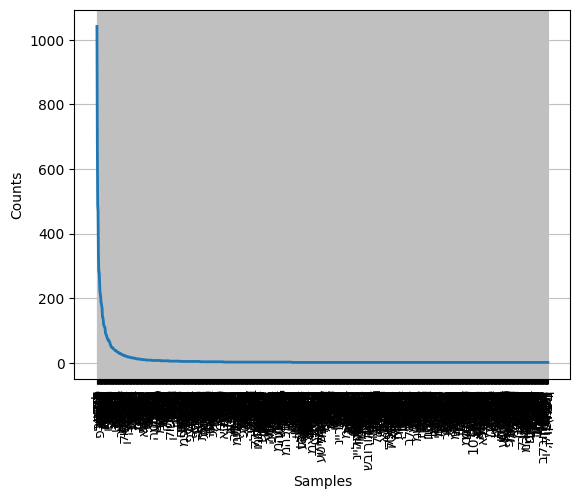

AttributeError: 'AxesSubplot' object has no attribute 'head'

In [112]:
text = ''
text = '\n'.join(df_merged['parit'])

text = text.replace('ריה', 'ר')
text = text.replace('ריות', 'ר')
text = text.replace('יים', '')
text = text.replace('ים', '')
text = text.replace('של', '')
text = text.replace('לי', 'ל')
text = text.replace('פת', 'פה')
text = text.replace('יות', 'ית')
text = text.replace('ונ', ' ון')

text = text.replace('סיג', 'סג')
text = text.split()
# print(text)
FreqDist(text).plot(50, cumulative= False)


In [107]:
unique_items = df_merged.parit.value_counts().to_dict()
unique_items = pd.DataFrame(unique_items, index=[0]) \
    .transpose().reset_index() \
    .rename(columns={
        'index' : 'parit',
        0 : 'count'
    })
unique_items = unique_items \
            .sort_values(by='count', ascending=False) \
            .reset_index(drop=True)
unique_items
# pd.DataFrame(unique_items)
unique_items[
    (unique_items['count'] > 10)
]
top_categories = unique_items[unique_items['count'] >5]
top_categories.head(10)

,parit,count
0,בדל סיגריה,319
1,סיגריה,290
2,מסכה,142
3,שקית זבל,130
4,נייר,103
5,מסיכה,97
6,שקית ניילון,84
7,שקית אשפה,78
8,מסטיק,78
9,כוס קפה,70


In [108]:
unique_items[
    (unique_items.parit.str.len() < 20) &
    unique_items.parit.str.contains('סיגר') |
    unique_items.parit.str.contains('סגר') |
    unique_items.parit.str.contains('בדל')
    # & unique_items.parit.str.len() < 20
]

len(unique_items[unique_items.parit.str.len()>30])
unique_items = unique_items[unique_items.parit.str.len()<20].reset_index( drop= True)
unique_items

,parit,count
0,בדל סיגריה,319
1,סיגריה,290
2,מסכה,142
3,שקית זבל,130
4,נייר,103
...,...,...
1344,סיגריה אלקטרונית,1
1345,שקי במבה,1
1346,כוס אייסקפה,1
1347,פקק משקה,1


In [62]:
# prof = ydp.ProfileReport(df_dropped)
# prof.to_notebook_iframe()

In [65]:
unique_items[
    (unique_items.parit.str.len() < 20) &
    unique_items.parit.str.contains('סיגר') |
    unique_items.parit.str.contains('סגר') |
    unique_items.parit.str.contains('בדל')
    # & unique_items.parit.str.len() < 20
]

,parit,count
0,בדל סיגריה,319
1,סיגריה,290
15,סגריה,50
18,קופסת סיגריות,48
28,בדיל סיגריה,40
...,...,...
1440,קופס סיגריה,1
1456,בל סיגריה,1
1461,בדילי סיגריה,1
1488,בדלי סגריות,1


In [64]:
# df[df.geo_location.isnull() & df.location_address.str.contains('\n')]